In [1]:
from hyperseti import hyperseti

bshuf filter already loaded, skip it.
lz4 filter already loaded, skip it.
zfp filter already loaded, skip it.


In [58]:
file_name = "GBT_58210_31246_HIP93185_fine.h5"

In [3]:
hyperseti.find_et_serial(file_name, gulp_size=2**13, limit=2)

<DataArray: shape=(16, 1, 8192), dims=('time', 'feed_id', 'frequency')>
[2021-04-24 00:33:29.615663] INFO: hyperseti.hyperseti: --- Boxcar size: 1 ---
[2021-04-24 00:33:29.623312] INFO: hyperseti.hyperseti: Dedopp setup time: 6.74ms
[2021-04-24 00:33:29.624130] INFO: hyperseti.hyperseti: Dedopp kernel time: 0.13ms
[2021-04-24 00:33:33.704624] INFO: hyperseti.hyperseti: Peak find time: 4079.14ms
[2021-04-24 00:33:33.706927] INFO: hyperseti.hyperseti: Peak find memcopy: 0.21ms
[2021-04-24 00:33:33.712478] INFO: hyperseti.hyperseti: --- Boxcar size: 2 ---
[2021-04-24 00:33:33.714384] INFO: hyperseti.hyperseti: Filter time: 0.39ms
[2021-04-24 00:33:33.715162] INFO: hyperseti.hyperseti: Dedopp setup time: 1.93ms
[2021-04-24 00:33:33.715900] INFO: hyperseti.hyperseti: Dedopp kernel time: 0.11ms
[2021-04-24 00:33:35.957854] INFO: hyperseti.hyperseti: Peak find time: 2241.18ms
[2021-04-24 00:33:35.959278] INFO: hyperseti.hyperseti: Peak find memcopy: 0.53ms
[2021-04-24 00:33:35.962160] INFO: h

[2021-04-24 00:34:34.109959] INFO: hyperseti.hyperseti: --- Boxcar size: 16 ---
[2021-04-24 00:34:34.111987] INFO: hyperseti.hyperseti: Filter time: 0.70ms
[2021-04-24 00:34:34.112808] INFO: hyperseti.hyperseti: Dedopp setup time: 2.05ms
[2021-04-24 00:34:34.113878] INFO: hyperseti.hyperseti: Dedopp kernel time: 0.07ms
[2021-04-24 00:34:34.384058] INFO: hyperseti.hyperseti: Peak find time: 269.23ms
[2021-04-24 00:34:34.385322] INFO: hyperseti.hyperseti: Peak find memcopy: 0.46ms
[2021-04-24 00:34:34.388749] INFO: hyperseti.hyperseti: --- Boxcar size: 32 ---
[2021-04-24 00:34:34.390298] INFO: hyperseti.hyperseti: Filter time: 0.24ms
[2021-04-24 00:34:34.391045] INFO: hyperseti.hyperseti: Dedopp setup time: 1.59ms
[2021-04-24 00:34:34.391903] INFO: hyperseti.hyperseti: Dedopp kernel time: 0.11ms
[2021-04-24 00:34:34.534896] INFO: hyperseti.hyperseti: Peak find time: 142.17ms
[2021-04-24 00:34:34.535833] INFO: hyperseti.hyperseti: Peak find memcopy: 0.18ms
[2021-04-24 00:34:53.798376] INF

,driftrate,f_start,snr,driftrate_idx,channel_idx,boxcar_size
7320,-0.267862,2802.815376,1.804430e+10,76.0,5961.0,32.0
7321,-0.535723,2802.810951,1.802762e+10,48.0,7545.0,32.0
7322,-0.841851,2802.822574,1.800313e+10,16.0,3385.0,32.0
7323,-0.363527,2802.811747,1.799976e+10,66.0,7260.0,32.0
7324,-0.889684,2802.811392,1.799219e+10,11.0,7387.0,32.0
...,...,...,...,...,...,...
3650,0.832285,2802.783933,3.389319e+09,191.0,831.0,1.0
3655,0.966215,2802.784875,3.380710e+09,205.0,494.0,1.0
3658,0.966215,2802.784883,3.366683e+09,205.0,491.0,1.0
3660,-0.669654,2802.763395,3.275258e+09,34.0,8182.0,1.0


In [40]:
from matplotlib import pyplot as plt
import numpy as np
import h5py as h5

In [59]:
f = h5.File(file_name, "r+")
f["data"].shape

(16, 1, 322961408)

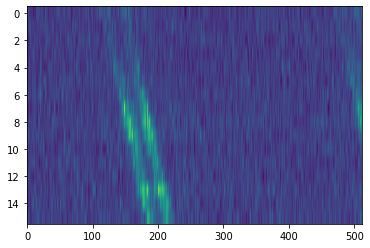

In [82]:
base = np.random.randint(0, 322961408 - 2**9)
d_slice = f["data"][:, 0, base:base + 2**9]
plt.imshow(d_slice, aspect="auto")

In [83]:
print(base)

116048342


In [327]:
from hyperseti.hyperseti import *
from skimage.exposure import equalize_adapthist

max_dd = 1

#peaks = create_empty_hits_table()    
ds = from_h5(file_name)
data_gen = ds.iterate_through_data({'frequency': 2**13})

for i in range(10000):
    d_arr = next(data_gen)

<DataArray: shape=(16, 1, 8192), dims=('time', 'feed_id', 'frequency')>
<DimensionScale 'frequency': start 1680.0384521484375 MHz step -2.7939677238464355e-06 MHz nstep 8192 > <TimeScale 'time': start 58210.36164351852 mjd step 18.253611008 sec nstep 16 >


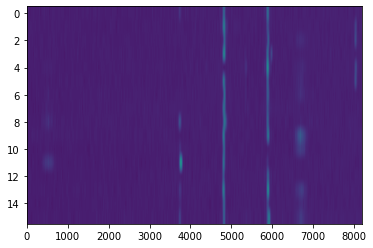

In [356]:
search_count = 0
out = []
for i in range(np.random.randint(200)):
    d_arr = next(data_gen)
print(d_arr)
d = d_arr.data
f = d_arr.frequency
t = d_arr.time
md = {'fch1': f.val_start * f.units, 'df': f.val_step * f.units, 'dt': t.val_step * t.units}
# dedopp, metadata, hits = run_pipeline(d, md, max_dd)
# out.append(hits)
# logger.info(f"{len(hits)} hits found")

# dframe = pd.concat(out)
# dframe.to_csv(filename_out)
# t1 = time.time()
# print(f"## TOTAL TIME: {(t1-t0):2.2f}s ##\n\n")
plt.imshow(equalize_adapthist(d[:, 0, :] / d.max()), aspect="auto")
print(f, t)

In [374]:
data = d
metadata = md
min_dd=None
threshold=50
min_fdistance=None
min_ddistance=None
n_boxcar=3
merge_boxcar_trials=False
apply_normalization=False

# t0 = time.time()
logger.debug(data.shape)
N_timesteps = data.shape[0]
_threshold = threshold * np.sqrt(N_timesteps)

# Apply preprocessing normalization
if apply_normalization:
    data = normalize(data, return_space='gpu')


peaks = create_empty_hits_table()

boxcar_trials = map(int, 2**np.arange(0, n_boxcar))
for boxcar_size in boxcar_trials:
    logger.info(f"--- Boxcar size: {boxcar_size} ---")
    dedopp, metadata = dedoppler(data, metadata, boxcar_size=boxcar_size,  boxcar_mode='sum',
                                 max_dd=max_dd, min_dd=min_dd, return_space='gpu')

    # Adjust SNR threshold to take into account boxcar size and dedoppler sum
    # Noise increases by sqrt(N_timesteps * boxcar_size)
    _threshold = threshold * np.sqrt(N_timesteps * boxcar_size)
    _peaks = hitsearch(dedopp, metadata, threshold=_threshold, min_fdistance=min_fdistance, min_ddistance=min_ddistance)

    if _peaks is not None:
        _peaks['snr'] /= np.sqrt(N_timesteps * boxcar_size)
        peaks = pd.concat((peaks, _peaks), ignore_index=True)

if merge_boxcar_trials:
    peaks = merge_hits(peaks)

# logger.info(f"Pipeline runtime: {(t1-t0):2.2f}s")

[2021-04-25 00:38:58.186349] INFO: hyperseti.hyperseti: --- Boxcar size: 1 ---
[2021-04-25 00:38:58.189114] INFO: hyperseti.hyperseti: Dedopp setup time: 1.45ms
[2021-04-25 00:38:58.190307] INFO: hyperseti.hyperseti: Dedopp kernel time: 0.21ms
[2021-04-25 00:39:01.925300] INFO: hyperseti.hyperseti: Peak find time: 3733.94ms
[2021-04-25 00:39:01.930770] INFO: hyperseti.hyperseti: Peak find memcopy: 4.64ms
[2021-04-25 00:39:01.936250] INFO: hyperseti.hyperseti: --- Boxcar size: 2 ---
[2021-04-25 00:39:01.938837] INFO: hyperseti.hyperseti: Filter time: 0.69ms
[2021-04-25 00:39:01.939679] INFO: hyperseti.hyperseti: Dedopp setup time: 2.63ms
[2021-04-25 00:39:01.940504] INFO: hyperseti.hyperseti: Dedopp kernel time: 0.16ms
[2021-04-25 00:39:04.038624] INFO: hyperseti.hyperseti: Peak find time: 2097.35ms
[2021-04-25 00:39:04.039650] INFO: hyperseti.hyperseti: Peak find memcopy: 0.32ms
[2021-04-25 00:39:04.042626] INFO: hyperseti.hyperseti: --- Boxcar size: 4 ---
[2021-04-25 00:39:04.044340] 

In [375]:
peaks.head(3)

,driftrate,f_start,snr,driftrate_idx,channel_idx,boxcar_size
0,0.258295,1680.024952,1.024645e+12,131,4832,1
1,-0.047832,1680.024999,9.988243e+11,99,4815,1
2,0.220029,1680.024960,9.973713e+11,127,4829,1


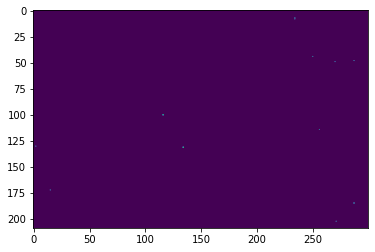

In [376]:
dedopp_cpu = dedopp.get()
show_dedopp = gaussian(dedopp_cpu, sigma=0)[:, 4700:5000]
# show_dedopp = dedopp_cpu[:, :200]
from skimage.filters import gaussian
plt.imshow(equalize_adapthist(show_dedopp / np.max(show_dedopp)), aspect="auto")

In [361]:
dedopp_cpu.shape

(209, 8192)